In [18]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

from NFW_Z import NFW_Z

%matplotlib inline

In [19]:
dm_300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_dm_5e8_rt_0300.txt")

dx_dm_300 = dm_300[:,4] / 1000 # converting pc to kpc
dy_dm_300 = dm_300[:,5] / 1000 # converting pc to kpc
dz_dm_300 = dm_300[:,6] / 1000 # converting pc to kpc
r_dm_300 = np.sqrt(dx_dm_300**2 + dy_dm_300**2 + dz_dm_300**2)
print(max(r_dm_300))

vx_dm_300 = dm_300[:,7]
vy_dm_300 = dm_300[:,8]
vz_dm_300 = dm_300[:,9]
vx_dm_COM = np.sum(vx_dm_300) / np.size(vx_dm_300)
vy_dm_COM = np.sum(vy_dm_300) / np.size(vy_dm_300)
vz_dm_COM = np.sum(vz_dm_300) / np.size(vz_dm_300)
vx_dm_new = vx_dm_300 - vx_dm_COM
vy_dm_new = vy_dm_300 - vy_dm_COM
vz_dm_new = vz_dm_300 - vz_dm_COM
v_dm_new = np.sqrt(vx_dm_new**2 + vy_dm_new**2 + vz_dm_new**2)

11.700723282344557


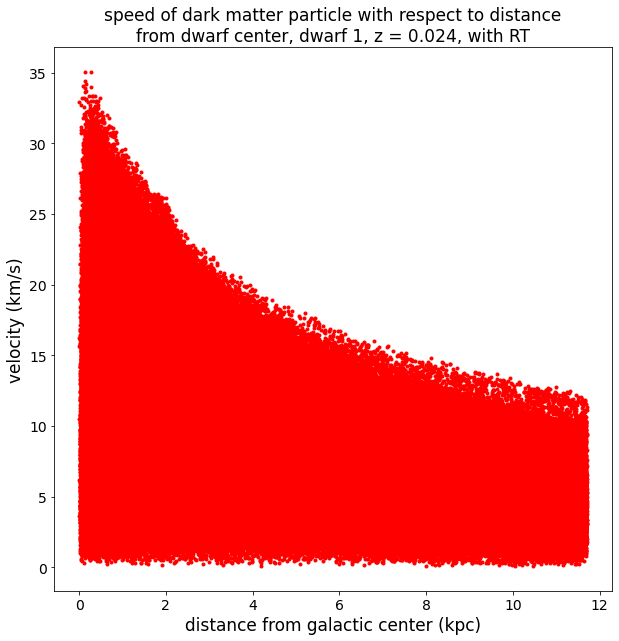

In [20]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_dm_300, v_dm_new, '.', color='red')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of dark matter particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [21]:
star_300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_star_5e8_rt_0300.txt")

dx_star_300 = star_300[:,4] / 1000 # converting pc to kpc
dy_star_300 = star_300[:,5] / 1000 # converting pc to kpc
dz_star_300 = star_300[:,6] / 1000 # converting pc to kpc
r_star_300 = np.sqrt(dx_star_300**2 + dy_star_300**2 + dz_star_300**2)

vx_star_300 = star_300[:,7]
vy_star_300 = star_300[:,8]
vz_star_300 = star_300[:,9]
vx_star_COM = np.sum(vx_star_300) / np.size(vx_star_300)
vy_star_COM = np.sum(vy_star_300) / np.size(vy_star_300)
vz_star_COM = np.sum(vz_star_300) / np.size(vz_star_300)
vx_star_new = vx_star_300 - vx_star_COM
vy_star_new = vy_star_300 - vy_star_COM
vz_star_new = vz_star_300 - vz_star_COM
v_star_new = np.sqrt(vx_star_new**2 + vy_star_new**2 + vz_star_new**2)

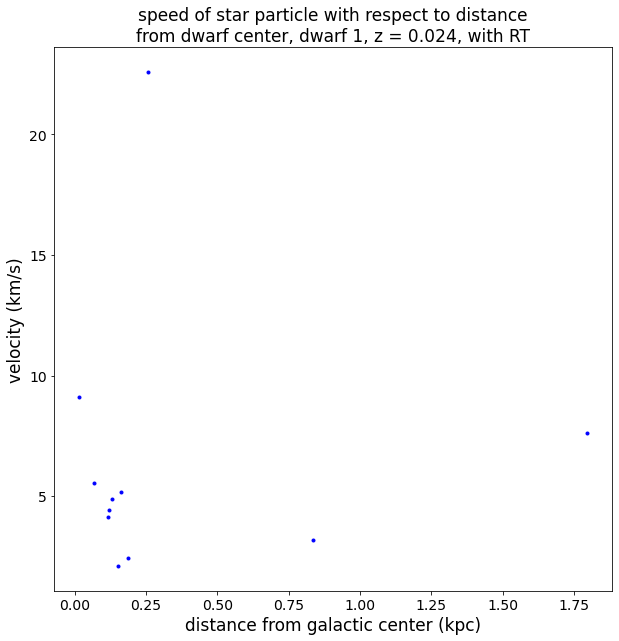

In [22]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_star_300, v_star_new, '.', color='blue')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of star particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [25]:
NFW_fit = NFW_Z(3.13e8, 'Jeon')
r_s = NFW_fit.r_s(0.024, 30)
sample_array = np.arange(0.01, 11.7, 0.02) #unit: kpc

v_esc = NFW_fit.v_esc(sample_array, 0.024, 30)
print(v_esc)

[43.20257763 42.84195679 42.49396509 42.15780385 41.83274682 41.51813173
 41.21335301 40.91785549 40.63112905 40.35270382 40.08214615 39.81905493
 39.56305848 39.31381173 39.07099377 38.83430563 38.60346838 38.37822133
 38.15832054 37.9435374  37.73365737 37.52847887 37.32781228 37.13147896
 36.93931051 36.75114792 36.56684095 36.38624748 36.20923296 36.03566983
 35.86543711 35.69841994 35.53450915 35.37360094 35.2155965  35.0604017
 34.90792682 34.75808628 34.61079836 34.46598503 34.32357167 34.18348693
 34.04566249 33.91003295 33.77653563 33.64511043 33.51569968 33.38824806
 33.26270241 33.13901167 33.01712673 32.89700038 32.77858719 32.66184339
 32.54672687 32.43319702 32.3212147  32.21074217 32.101743   31.99418205
 31.88802538 31.7832402  31.67979482 31.57765863 31.47680201 31.3771963
 31.27881378 31.18162761 31.08561181 30.9907412  30.89699138 30.80433871
 30.71276027 30.62223382 30.53273779 30.44425125 30.35675387 30.27022594
 30.18464828 30.10000229 30.01626986 29.93343342 29.8

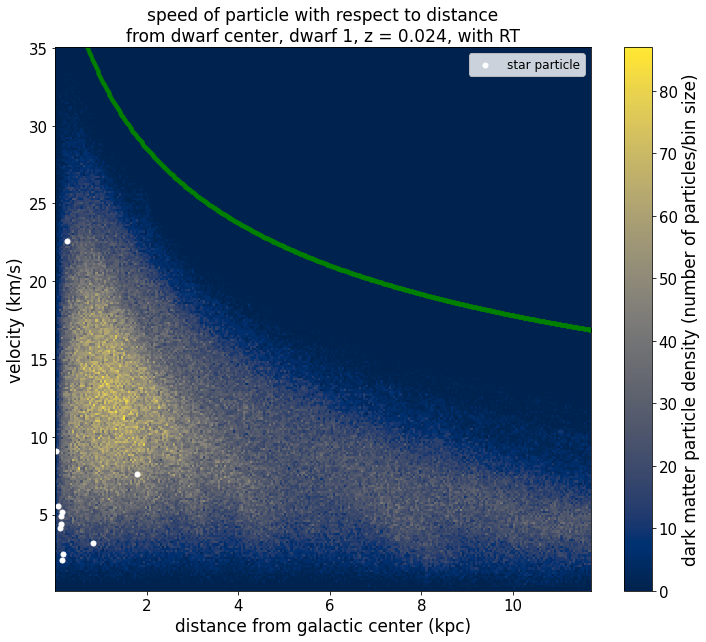

In [32]:
fig, ax = plt.subplots(figsize=[12, 10])

plt.hist2d(r_dm_300, v_dm_new, bins=250, cmap='cividis')
cbar = plt.colorbar()
cbar.set_label(label='dark matter particle density (number of particles/bin size)', size=17)
cbar.ax.tick_params(labelsize=15)

plt.scatter(r_star_300, v_star_new, 25, color='white', label='star particle')
plt.scatter(sample_array, v_esc, 12, color='green')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=12)

plt.show()